# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Load Necessary Libraries

In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [249]:
# Load your dataset
df = pd.read_csv('Salaries.csv')

# 1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [250]:
num_rows, num_cols = df.shape
print(f'num_rows: {num_rows}    num_cols: {num_cols}')

num_rows: 148654    num_cols: 13


In [251]:
data_types = df.dtypes
print('Data types: ')
print(data_types)

Data types: 
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [252]:
print(f'missing values:\n{df.isnull().sum()}')

missing values:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# 2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [253]:
salary_stats={
    'mean': df['TotalPay'].mean(),
    'median':df['TotalPay'].median(),
    'mode':df['TotalPay'].mode(),
    'minimum':df['TotalPay'].min(),
    'maximum':df['TotalPay'].max(),
    'range':df['TotalPay'].max() - df['TotalPay'].min(),
    'std':df['TotalPay'].std()
}
salary_stats= pd.DataFrame(salary_stats)
salary_stats

,mean,median,mode,minimum,maximum,range,std
0,74768.321972,71426.61,0.0,-618.13,567595.43,568213.56,50517.005274


# 3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.


In [254]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [255]:
# drop duplicates
df = df.drop_duplicates()

In [256]:
# drop useless columns
df = df.drop(['Notes', 'Status'], axis=1)

In [257]:
# drop rows with base pay <=0
df = df[df['BasePay'] > 0]

In [258]:
print(f'missing values:\n{df.isnull().sum()}')

missing values:
Id                      0
EmployeeName            0
JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits            35707
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64


In [259]:
# The number of rows with missing values is relatively small compared to the total dataset, we may choose to simply remove those rows.
df.dropna(inplace=True)

In [260]:
print(f'missing values:\n{df.isnull().sum()}')

missing values:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


# 4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

### Set 'Department' based on 'JobTitle'

In [261]:
# Count the occurrences of each job title
job_title_counts = df['JobTitle'].value_counts()

# Create a new DataFrame with job titles and their corresponding counts
job_title_counts_df = pd.DataFrame({'JobTitle': job_title_counts.index, 'Count': job_title_counts.values})

# Save the DataFrame to a text file (replace 'output_file.txt' with your desired file name)
job_title_counts_df.to_csv('JobTitleCounts.txt', index=False, sep='\t')

# Display the result
job_title_counts_df

,JobTitle,Count
0,Transit Operator,6914
1,Special Nurse,4348
2,Registered Nurse,3690
3,Public Svc Aide-Public Works,2510
4,Custodian,2392
...,...,...
1100,"Commissioner 16.700c, No Pay",1
1101,Chief Investment Officer,1
1102,Chief Forensic Toxicologist,1
1103,Lieutenant (Police Department),1


In [262]:
# Define the job titles for Transportation and Public Services
transportation_job_titles = ['Transit Operator', 'Transit Supervisor', 'Transit Planner', 'Transit Operations Specialist', 'Transit Fare Inspector', 'Train Controller', 'Transit Traffic Checker', 'Traffic Signal Electrician', 'Parking Control Officer', 'Airport Safety Officer', 'Airport Operations Supervisor', 'Wharfinger', 'Harbor Water Quality Tech', 'Dockworker']

# Set the Department value for job titles in the Transportation and Public Services category
df.loc[df['JobTitle'].isin(transportation_job_titles), 'Department'] = 'Transportation and Public Services'



In [263]:
# Define the job titles for Health and Medical Services
medical_job_titles = ['Special Nurse', 'Registered Nurse', 'Nurse Practitioner', 'Patient Care Assistant', 'Nursing Assistant', 'Psychiatric Social Worker', 'Medical Social Worker', 'Pharmacist', 'Pharmacy Technician', 'Dental Aide', 'Dental Hygienist', 'Therapist (Physical, Occupational)', 'Respiratory Care Practitioner', 'Occupational Therapist', 'Dietitian', 'Anesthetist', 'Home Health Aide', 'Lab Technician']

# Set the Department value for job titles in the Health and Medical Services category
df.loc[df['JobTitle'].isin(medical_job_titles), 'Department'] = 'Health and Medical Services'


In [264]:
# Define the job titles for Law Enforcement and Public Safety
public_safety_job_titles = ['Police Officer', 'Deputy Sheriff', 'Sheriff\'s Sergeant', 'Firefighter', 'Fire Safety Inspector', 'Deputy Probation Officer', 'Emergency Medical Services Agency Specialist', 'Public Safety Communications Dispatcher', 'Protective Services Worker', 'Sheriff\'s Cadet']

# Set the Department value for job titles in the Law Enforcement and Public Safety category
df.loc[df['JobTitle'].isin(public_safety_job_titles), 'Department'] = 'Law Enforcement and Public Safety'



In [265]:
# Define the job titles for Administration and Clerical
admin_clerical_job_titles = ['Administrative Analyst', 'Clerk', 'Senior Clerk', 'Junior Clerk', 'Clerk Typist', 'Principal Clerk', 'Senior Administrative Analyst', 'Management Assistant', 'Executive Secretary', 'Secretary']

# Set the Department value for job titles in the Administration and Clerical category
df.loc[df['JobTitle'].isin(admin_clerical_job_titles), 'Department'] = 'Administration and Clerical'


In [266]:
# Define the job titles for Engineering and Technical
engineering_technical_job_titles = ['Engineer', 'Stationary Engineer', 'Electrical Transit System Mechanic', 'IS Engineer', 'Electronics Maintenance Tech', 'IS Business Analyst', 'Construction Inspector', 'Electrical Inspector', 'Structural Engineer', 'Survey Associate', 'Landscape Architect', 'Architect', 'Water Operations Analyst']

# Set the Department value for job titles in the Engineering and Technical category
df.loc[df['JobTitle'].isin(engineering_technical_job_titles), 'Department'] = 'Engineering and Technical'


In [267]:
# Define the job titles for Maintenance and Facilities
maintenance_facilities_job_titles = ['Custodian', 'General Laborer', 'Maintenance Machinist', 'Painter', 'Plumber', 'Electrician', 'Automotive Mechanic', 'Stationary Engineer, Sewage Plant', 'Carpenter', 'Heavy Equipment Operator', 'Maintenance Scheduler', 'Boiler Technician', 'Locksmith']

# Set the Department value for job titles in the Maintenance and Facilities category
df.loc[df['JobTitle'].isin(maintenance_facilities_job_titles), 'Department'] = 'Maintenance and Facilities'


In [268]:
# Define the job titles for Legal and Judicial
legal_judicial_job_titles = ['Attorney (Civil/Criminal)', 'Legal Secretary', 'Court Reporter', 'Court Clerk', 'Paralegal', 'Legal Assistant', 'District Attorney Investigative Assistant']

# Set the Department value for job titles in the Legal and Judicial category
df.loc[df['JobTitle'].isin(legal_judicial_job_titles), 'Department'] = 'Legal and Judicial'


In [269]:
# Define the job titles for Social Services and Community Development
social_services_job_titles = ['Social Worker', 'Eligibility Worker', 'Community Police Services Aide', 'Employment & Training Specialist', 'Recreation Leader', 'Community Development Specialist', 'Park Section Supervisor', 'Housing Inspector', 'Librarian', 'Marriage, Family & Child Counselor']

# Set the Department value for job titles in the Social Services and Community Development category
df.loc[df['JobTitle'].isin(social_services_job_titles), 'Department'] = 'Social Services and Community Development'


In [270]:
# Define the job titles for Finance and Accounting
finance_accounting_job_titles = ['Accountant', 'Payroll Clerk', 'Budget Analyst', 'Fiscal Technician', 'Auditor', 'Claims Adjuster', 'Benefits Analyst']

# Set the Department value for job titles in the Finance and Accounting category
df.loc[df['JobTitle'].isin(finance_accounting_job_titles), 'Department'] = 'Finance and Accounting'


In [271]:
# Define the job titles for Information Technology
it_job_titles = ['IT Operations Support Administrator', 'IS Programmer Analyst', 'IS Business Analyst', 'Systems Engineer', 'Database Administrator']

# Set the Department value for job titles in the Information Technology category
df.loc[df['JobTitle'].isin(it_job_titles), 'Department'] = 'Information Technology'

In [272]:
# Define the job titles for Education and Library Services
education_library_job_titles = ['Library Page', 'Library Assistant', 'Librarian', 'School Crossing Guard']

# Set the Department value for job titles in the Education and Library Services category
df.loc[df['JobTitle'].isin(education_library_job_titles), 'Department'] = 'Education and Library Services'

In [273]:
# Define the job titles for Human Resources and Management
hr_management_job_titles = ['Human Resources Analyst', 'Manager', 'Personnel Analyst', 'Chief Deputy', 'Director', 'Chief Stationary Engineer']

# Set the Department value for job titles in the Human Resources and Management category
df.loc[df['JobTitle'].isin(hr_management_job_titles), 'Department'] = 'Human Resources and Management'

In [274]:
# Calculate the number of null values for department column
null_counts = df.isnull().sum()
not_null_count = df['Department'].count()
# Display the result
print(f'null values: {null_counts.Department}   not null: {not_null_count}')

null values: 64663   not null: 46366


In [317]:
# I will drop the null values and work on the remaining 
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

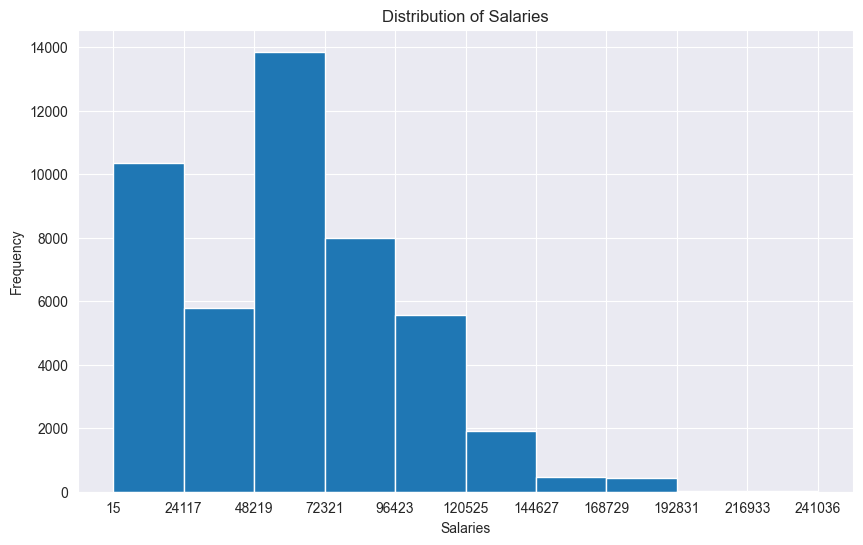

In [318]:
plt.figure(figsize=(10,6))
bars = plt.hist(df['BasePay'], bins=10)
plt.title('Distribution of Salaries')
plt.xlabel('Salaries')
plt.ylabel('Frequency')
plt.xticks((bars[1]).astype(int))
plt.show()

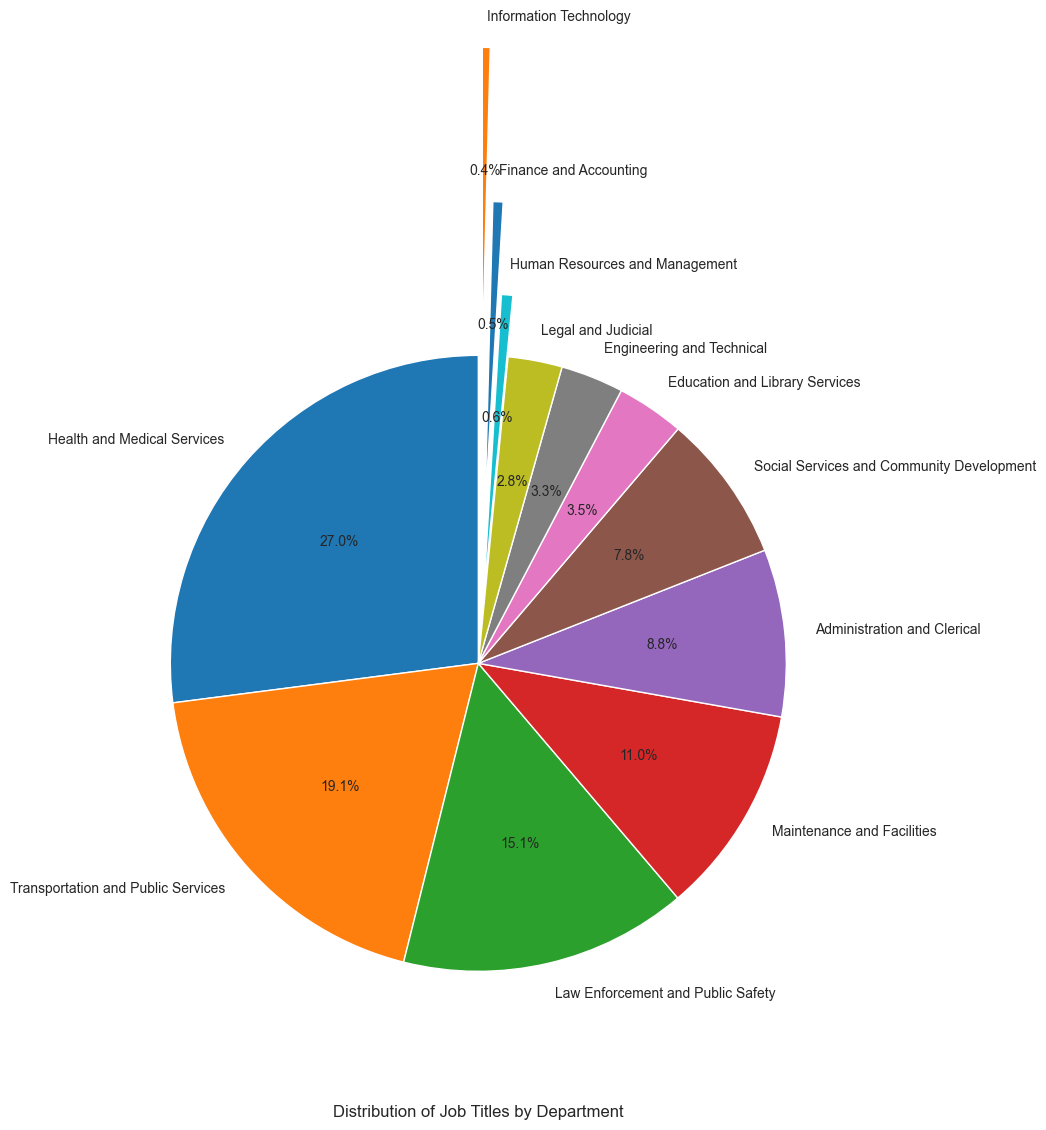

In [347]:
# Count the number of occurrences for each department
department_counts = df['Department'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10,10))
explode=(0,0,0,0,0,0,0,0,0,0.2,0.5,1)
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Distribution of Job Titles by Department', y=-0.1)
plt.savefig('piechart.png', dpi=300)
plt.show()

# 5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

## Grouping data due to department 

In [322]:
departments = df.groupby('Department') 

In [328]:
# Grouping by 'Department' and calculating summary statistics for multiple columns
summary_statistics = df.groupby('Department').agg({
    'BasePay': ['mean', 'median', 'std', 'min', 'max', 'count'],
    'TotalPayBenefits': ['mean', 'median', 'std', 'min', 'max', 'count']
})


summary_statistics


BasePay              \
                                                    mean      median   
Department                                                             
Administration and Clerical                 47535.216080   51250.000   
Education and Library Services              20758.942506   15388.900   
Engineering and Technical                   90985.646860   83658.090   
Finance and Accounting                      59304.591573   63947.105   
Health and Medical Services                 62401.305533   60232.835   
Human Resources and Management              70306.990254   76629.775   
Information Technology                      76930.765602   86733.200   
Law Enforcement and Public Safety           90051.319590   94691.010   
Legal and Judicial                         125855.188345  137439.800   
Maintenance and Facilities                  54714.317088   54703.000   
Social Services and Community Development   27275.650269   12594.030   
Transportation and Public Services          54638.559462   62951.410   

                                                                             \
                                                    std      min        max   
Department                                                                    
Administration and Clerical                29076.002772    48.91  122450.52   
Education and Library Services             15666.798098    31.75   60547.26   
Engineering and Technical                  36416.218359   292.20  194905.01   
Finance and Accounting                     21714.121949   324.65  113831.54   
Health and Medical Services                45977.796456    18.81  241036.02   
Human Resources and Management             24024.970964  2486.00  106754.18   
Information Technology                     22022.573508  3730.33   94694.62   
Law Enforcement and Public Safety          26838.732601   309.90  139171.03   
Legal and Judicial                         51660.963940    50.08  193686.08   
Maintenance and Facilities                 21955.294747    41.95  104896.00   
Social Services and Community Development  27237.378492    15.50  111526.53   
Transportation and Public Services         21759.649330   130.48  124304.50   

                                                 TotalPayBenefits              \
                                           count             mean      median   
Department                                                                      
Administration and Clerical                 4069     68932.342772   78627.160   
Education and Library Services              1644     29852.702920   17804.295   
Engineering and Technical                   1532    132054.634014  135044.835   
Finance and Accounting                       248     87565.772823   96223.375   
Health and Medical Services                12542     89996.325934   87761.850   
Human Resources and Management               276    101491.454674  107417.825   
Information Technology                       191    106978.577644  120660.920   
Law Enforcement and Public Safety           7007    148277.361596  149873.450   
Legal and Judicial                          1317    168212.926279  182446.000   
Maintenance and Facilities                  5099     85037.692834   85268.690   
Social Services and Community Development   3608     40138.266669   13508.935   
Transportation and Public Services          8833     96759.447010  106160.050   

                                                                             \
                                                    std      min        max   
Department                                                                    
Administration and Clerical                40828.929722    49.40  160173.30   
Education and Library Services             24922.142704    32.07   91310.51   
Engineering and Technical                  47460.941225   295.12  250398.39   
Finance and Accounting                     31568.840256   463.52  158129.83   
Health and Me

# 6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

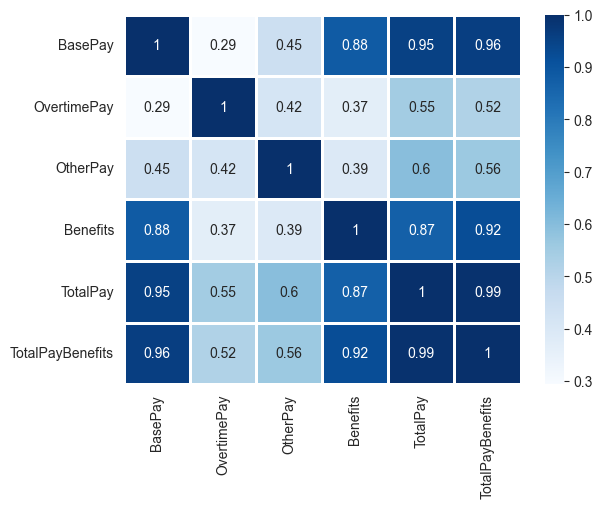

In [348]:
Numerical_cols = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']]
Numerical_cols_corr = Numerical_cols.corr()
sns.heatmap(Numerical_cols_corr, annot=True, cmap='Blues', linewidths=1)
plt.savefig('heatmapCorr.png', dpi=300)

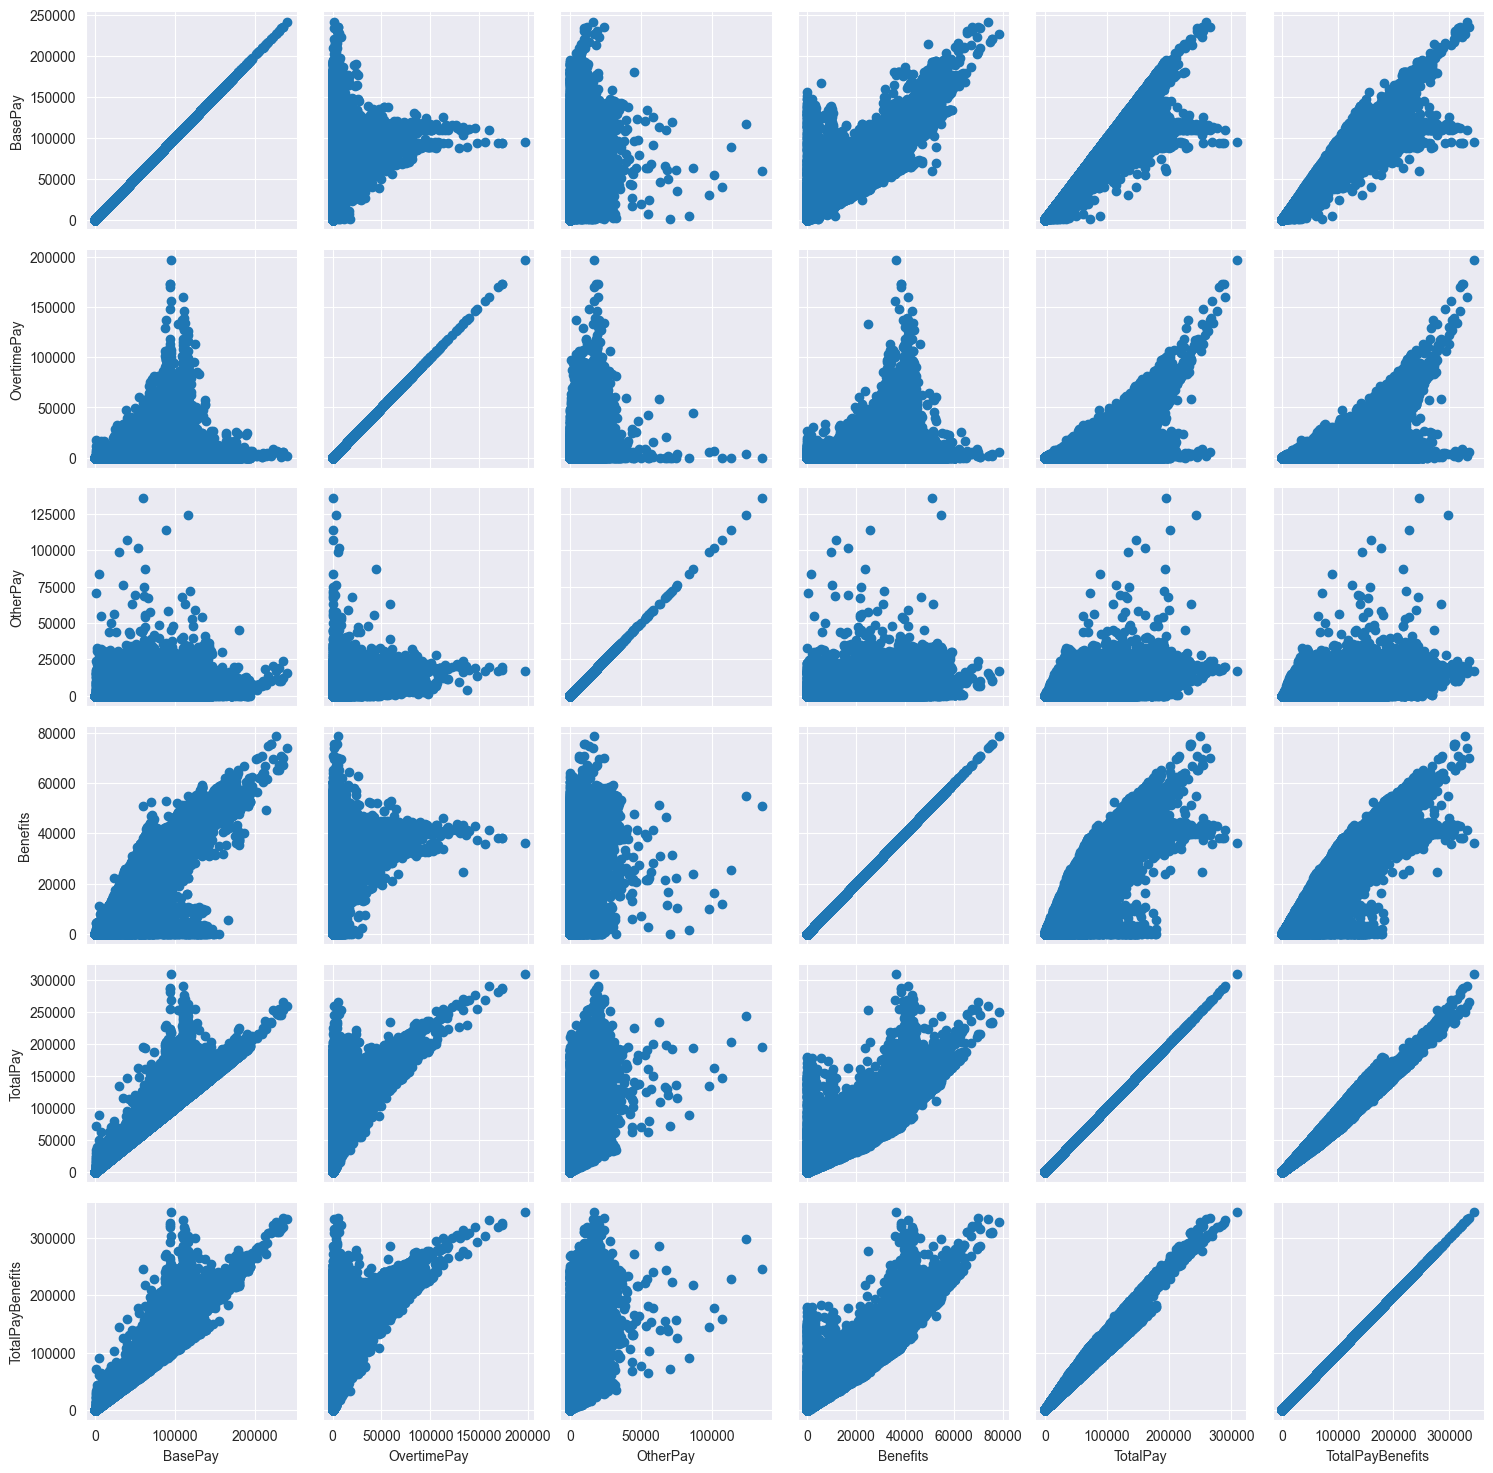

In [346]:
# Specify x_vars and y_vars to define the combinations of variables
plot = sns.PairGrid(Numerical_cols)

# Use the map method to create scatter plots
plot.map(plt.scatter)

# 7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

1. The most frequent salary between 45k to 75k
2. 27% of employees are in the Health and Medical Services department
3. Correlation between total bay and total bay  is maximum
4. correlation between overtime pay and base pay is minimum